# Kalp Hastalığı üzerine Makine Öğrenmesi

# İçindekiler

* Veri Seti: Heart Disease UCI
    * Kütüphaneler
    * Veri Okuma
    * Veri'ye İlk Bakış
    * Verinin İşlemlere Hazır Düzeye Getirilmesi
* Veriyi Görselleştirmek ve anlam çıkarmak
* Classification Modelleri
    * Logistic Regression
    * K-Nearest Neighbour (KNN)
    * Support Vector Machine (SVM) 
    * Naive Bayes
    * Decision Tree
    * Random Forest
    * Evualuation Classificution Models
* Classification Modellerinin Başarı Değerlerinin Karşılaştırılması ve Görselleştirilmesi


# Veri Seti : Heart Disease UCI

### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Attribute Information:

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

### Acknowledgements
#### Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

### Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.


https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Kütüphaneler

In [306]:
# Matematik

import numpy as np 
import pandas as pd 

# Görselleştirme

import matplotlib.pyplot as plt
import seaborn as sns

## Veri Okuma

In [307]:
data = pd.read_csv("../input/heart-disease-uci/heart.csv")

## Veri'ye ilk bakış

In [308]:
print("Veri'nin ilk 5 satırı")
data.head()

Veri'nin ilk 5 satırı


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [309]:
print("Veri'nin son 5 satırı")
data.tail()

Veri'nin son 5 satırı


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [310]:
print("Satır/Sütun") 
data.shape

Satır/Sütun


(303, 14)

In [311]:
print("Verimiz sütunlarında kaç farklı değer barındırıyor.")
data.nunique()

Verimiz sütunlarında kaç farklı değer barındırıyor.


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [312]:
print("Veri için korelasyon bilgileri") 

# Görselleştirilmiş hai bizim için daha iyi ve anlaşılır olucaktır.
data.corr()

Veri için korelasyon bilgileri


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [313]:
print("Veri hakkında temel bilgiler")
data.describe()

Veri hakkında temel bilgiler


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [314]:
print("Veri hakkında bilgiler")
data.info()

Veri hakkında bilgiler
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Verinin işlemlere hazır düzeye getirilmesi

In [315]:
print("Boş değerlerin tablo şeklinde gösterimi")
data.isnull()

Boş değerlerin tablo şeklinde gösterimi


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [316]:
print("Boş değerlerin sütun  bazlı toplanması")

data.isnull().sum(axis=0)

Boş değerlerin sütun  bazlı toplanması


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [317]:
print("Sütunların isimlerinin incelenmesi")
data.columns

Sütunların isimlerinin incelenmesi


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Veriyi Görselleştirmek ve anlam çıkarmak

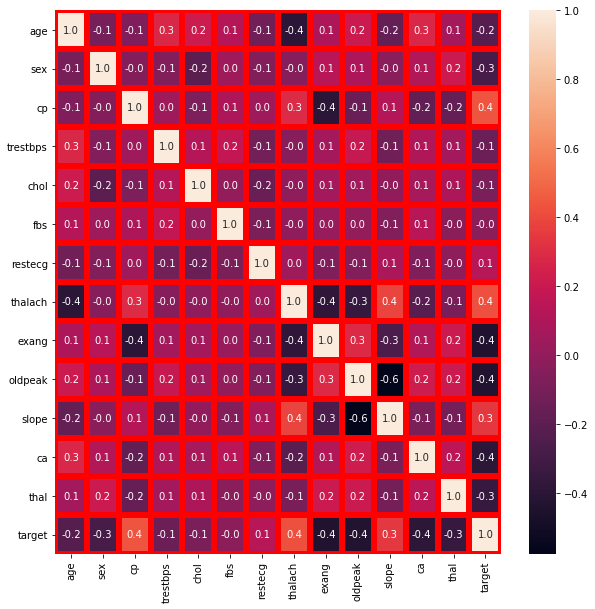

In [318]:
f, ax = plt.subplots(figsize=(10,10))

# annot = True : renklerin içinde sayılarda yazsın
# linewidths = 5 :aralardaki kırmızı çizginin boyutu
# linecolor = red : aralardaki kırmızı çizginin rengi
# ax = ax : belirlediğim değerleri koyucam

sns.heatmap(data.corr(), annot=True, linewidths=5, linecolor="red", fmt =".1f",ax=ax)
plt.show()

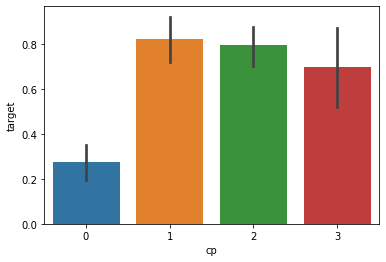

In [319]:
sns.barplot(x="cp",
           y="target",
           data=data,)

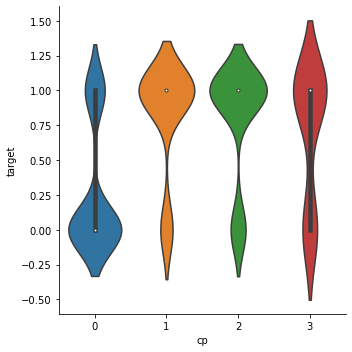

In [320]:
sns.catplot(x="cp",
           y="target",
           data=data,
           kind="violin")

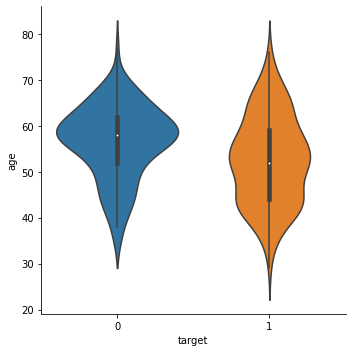

In [321]:
sns.catplot(y="age",x="target",data=data,kind="violin")

## x ve y datalarını belirlemek

In [322]:
y= data.target.values

x_data = data.drop(["target"],axis=1)

## Normalizasyon

In [323]:
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [324]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


## Tren Test Split

In [325]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Classification Modelleri

## Logistic Regression

In [326]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

lr.fit(x_train,y_train)

print("Logistic Regression test başarısı {}".format(lr.score(x_test,y_test)))

Logistic Regression test başarısı 0.8524590163934426


## K-Nearest Neighbour (KNN)

In [327]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) # k

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [328]:
predict = knn.predict(x_test)
predict

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [329]:
print("KNN test başarısı ({}) test başarısı: {} ".format(3,knn.score(x_test,y_test)))

KNN test başarısı (3) test başarısı: 0.8360655737704918 


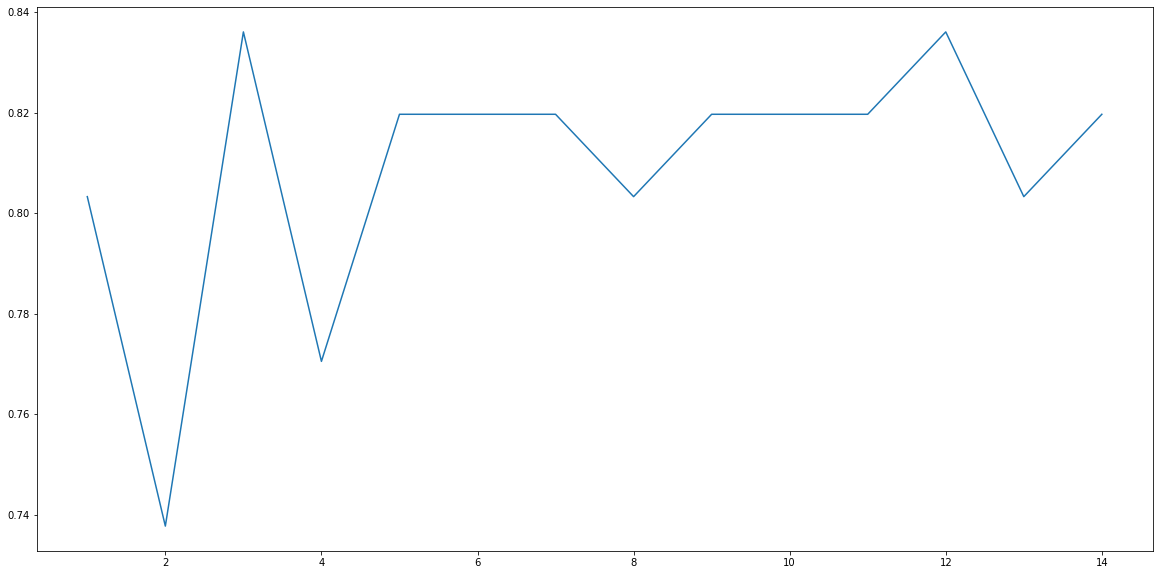

In [330]:
# find k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(20,10))
plt.plot(range(1,15),score_list)

plt.show()

In [331]:
# Belirlediğimiz k değerinden daha başarılı k değerleri varsa modelimizi o k değeri ile eğitebilirdik. Ama biz en başarılı olanı seçmişiz zaten.

## Support Vector Machine (SVM) Classification

In [332]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

SVC(random_state=1)

In [333]:
print("SVM nin test başarısı {}".format(svm.score(x_test,y_test)))

SVM nin test başarısı 0.8360655737704918


## Naive Bayes

In [334]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [335]:
print("Naive Bayes test değerleri {}".format(nb.score(x_test,y_test)))

Naive Bayes test değerleri 0.8688524590163934


## Decision Tree Classification

In [336]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Decision Tree test değerleri {}".format(dt.score(x_test,y_test)))

Decision Tree test değerleri 0.819672131147541


## Random Forest

In [337]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators =100, random_state=1)
rf.fit(x_train,y_train)

print("Random Forest test değerleri {}".format(rf.score(x_test,y_test)))

Random Forest test değerleri 0.8524590163934426


## Evualuation Classificution Models

In [338]:
y_pred = rf.predict(x_test)
y_true = y_test

In [339]:
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)


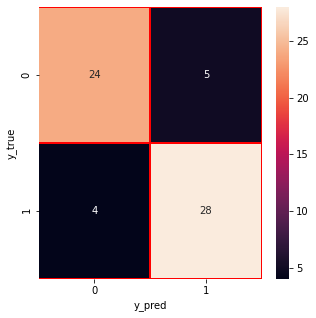

In [340]:
# %% cm visualization
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


# Classification Modellerinin Başarı Değerlerinin Karşılaştırılması ve Görselleştirilmesi


In [341]:
lr_score = lr.score(x_test,y_test)
knn_score = knn.score(x_test,y_test)
svm_score = svm.score(x_test,y_test)
nb_score = nb.score(x_test,y_test)
dt_score = dt.score(x_test,y_test)

models_data =["Lr","Knn","Svm","Nb","Dt"]
score_data = [lr_score,knn_score,svm_score,nb_score,dt_score]


In [342]:
score_data

[0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8688524590163934,
 0.819672131147541]

In [343]:
df = pd.DataFrame({'Models': models_data,'Score':score_data})
df

,Models,Score
0,Lr,0.852459
1,Knn,0.836066
2,Svm,0.836066
3,Nb,0.868852
4,Dt,0.819672


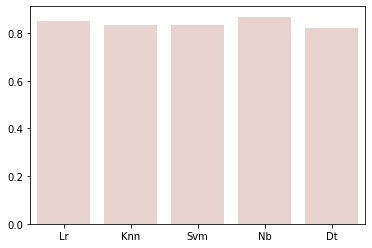

In [344]:
sns.barplot(x= models_data, y= score_data,palette = sns.cubehelix_palette(len(x)))

In [345]:
# asceding : azalan sıralama
new_index = (df["Score"].sort_values(ascending=False)).index.values

# indexleri değiştir
sorted_data = df.reindex(new_index)

In [346]:
sorted_data

,Models,Score
3,Nb,0.868852
0,Lr,0.852459
2,Svm,0.836066
1,Knn,0.836066
4,Dt,0.819672


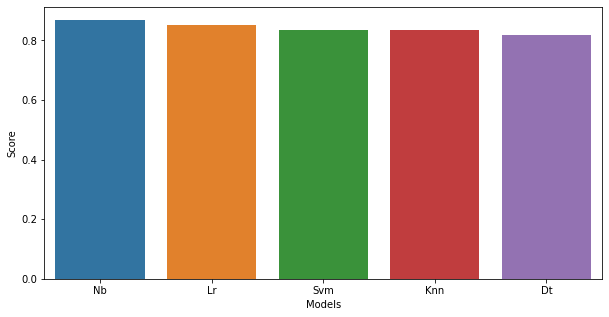

In [347]:
plt.figure(figsize=(10,5)) 

sns.barplot(x="Models", y="Score",data=sorted_data)